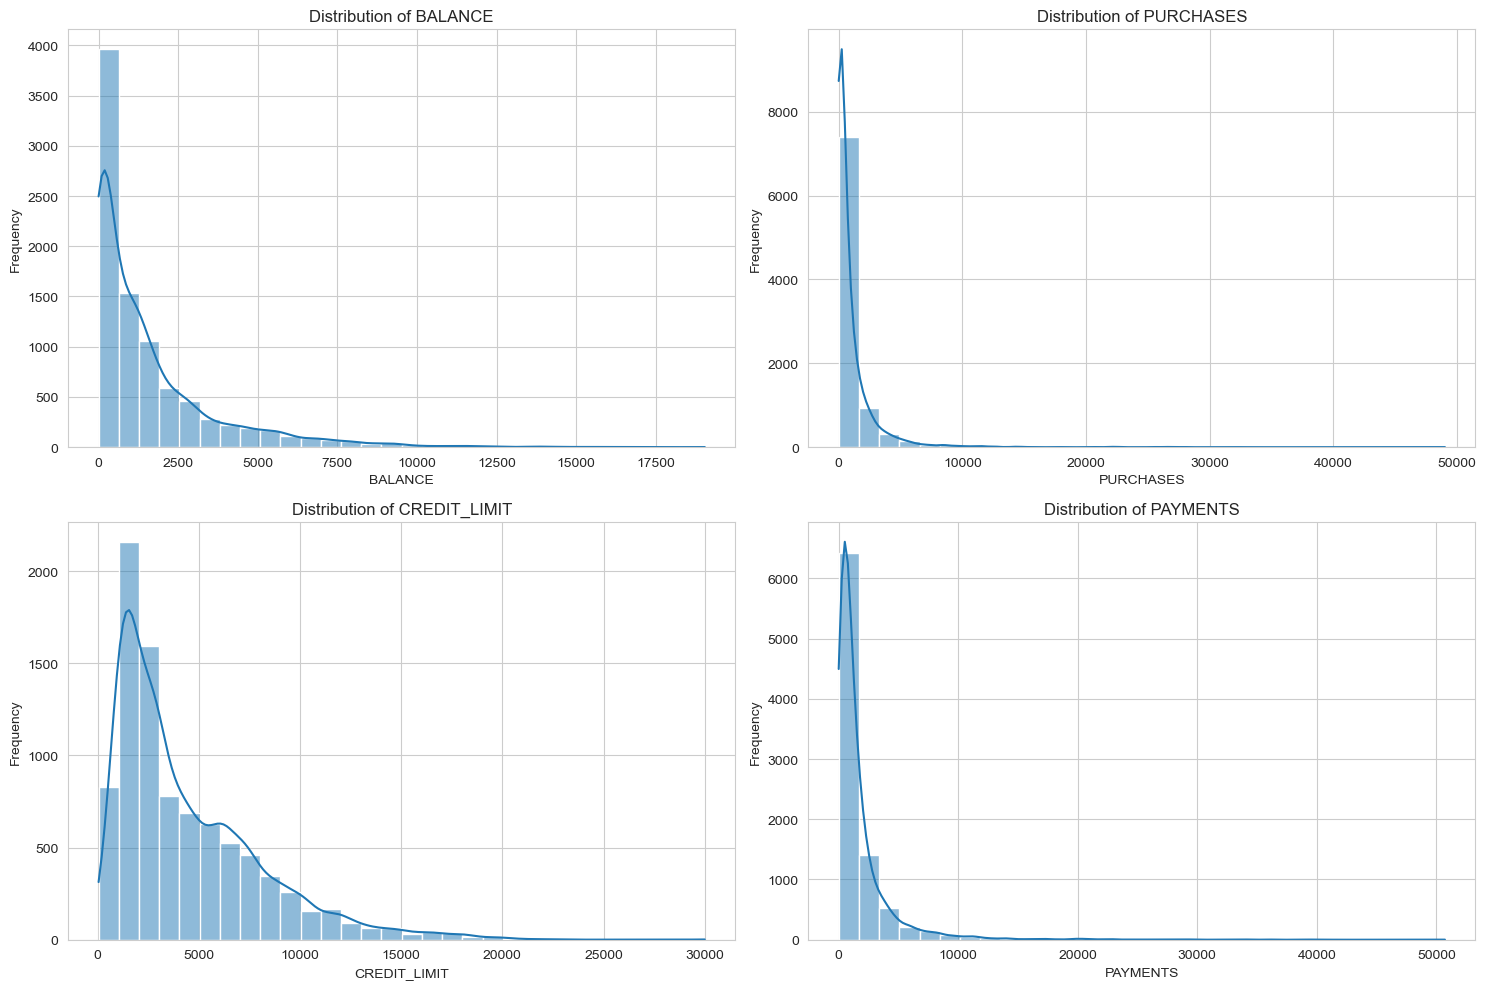

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
columns_to_visualize = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(columns_to_visualize):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_1360\3478151512.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_1360\3478151512.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

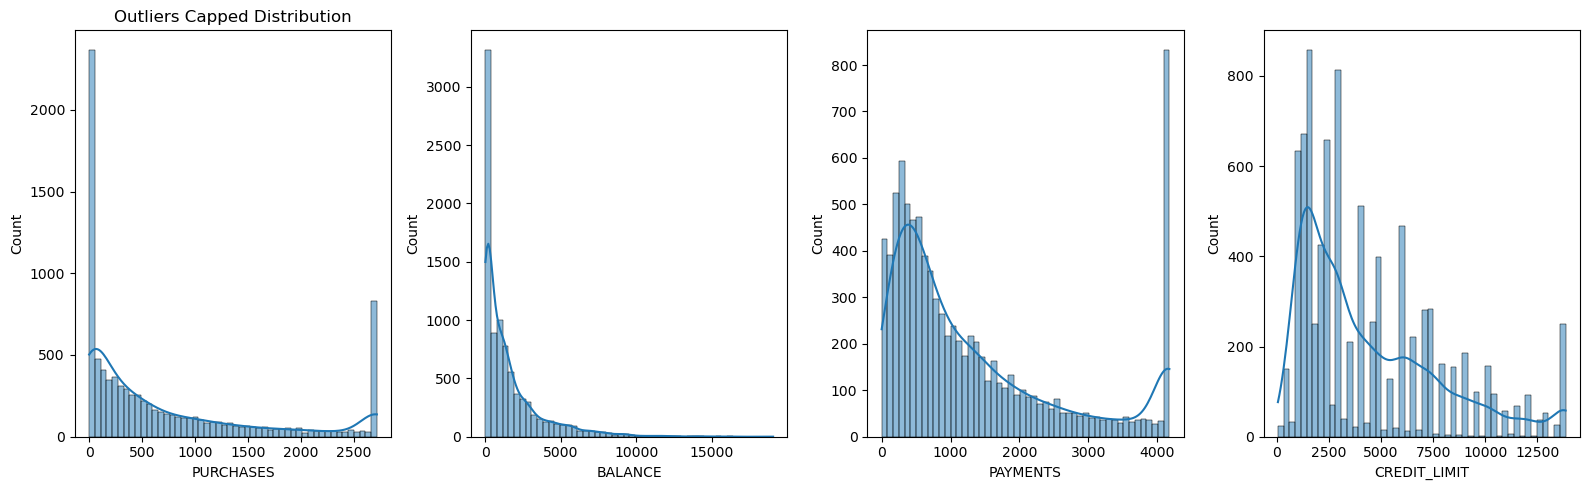

In [4]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
features = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS',
    'CREDIT_LIMIT', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT'
]
df_features = df[features]
for col in ['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']:
    Q1 = df_features[col].quantile(0.25)
    Q3 = df_features[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df_features[col] = np.where(df_features[col] > upper_bound, upper_bound, df_features[col])
robust_scaler = RobustScaler()
df_processed = robust_scaler.fit_transform(df_features)
df_processed = pd.DataFrame(df_processed, columns=features)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 5))
sns.histplot(df_features['PURCHASES'], bins=50, kde=True, ax=ax1)
sns.histplot(df_features['BALANCE'], bins=50, kde=True, ax=ax2)
sns.histplot(df_features['PAYMENTS'], bins=50, kde=True, ax=ax3)
sns.histplot(df_features['CREDIT_LIMIT'], bins=50, kde=True, ax=ax4)

ax1.set_title('Outliers Capped Distribution')
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

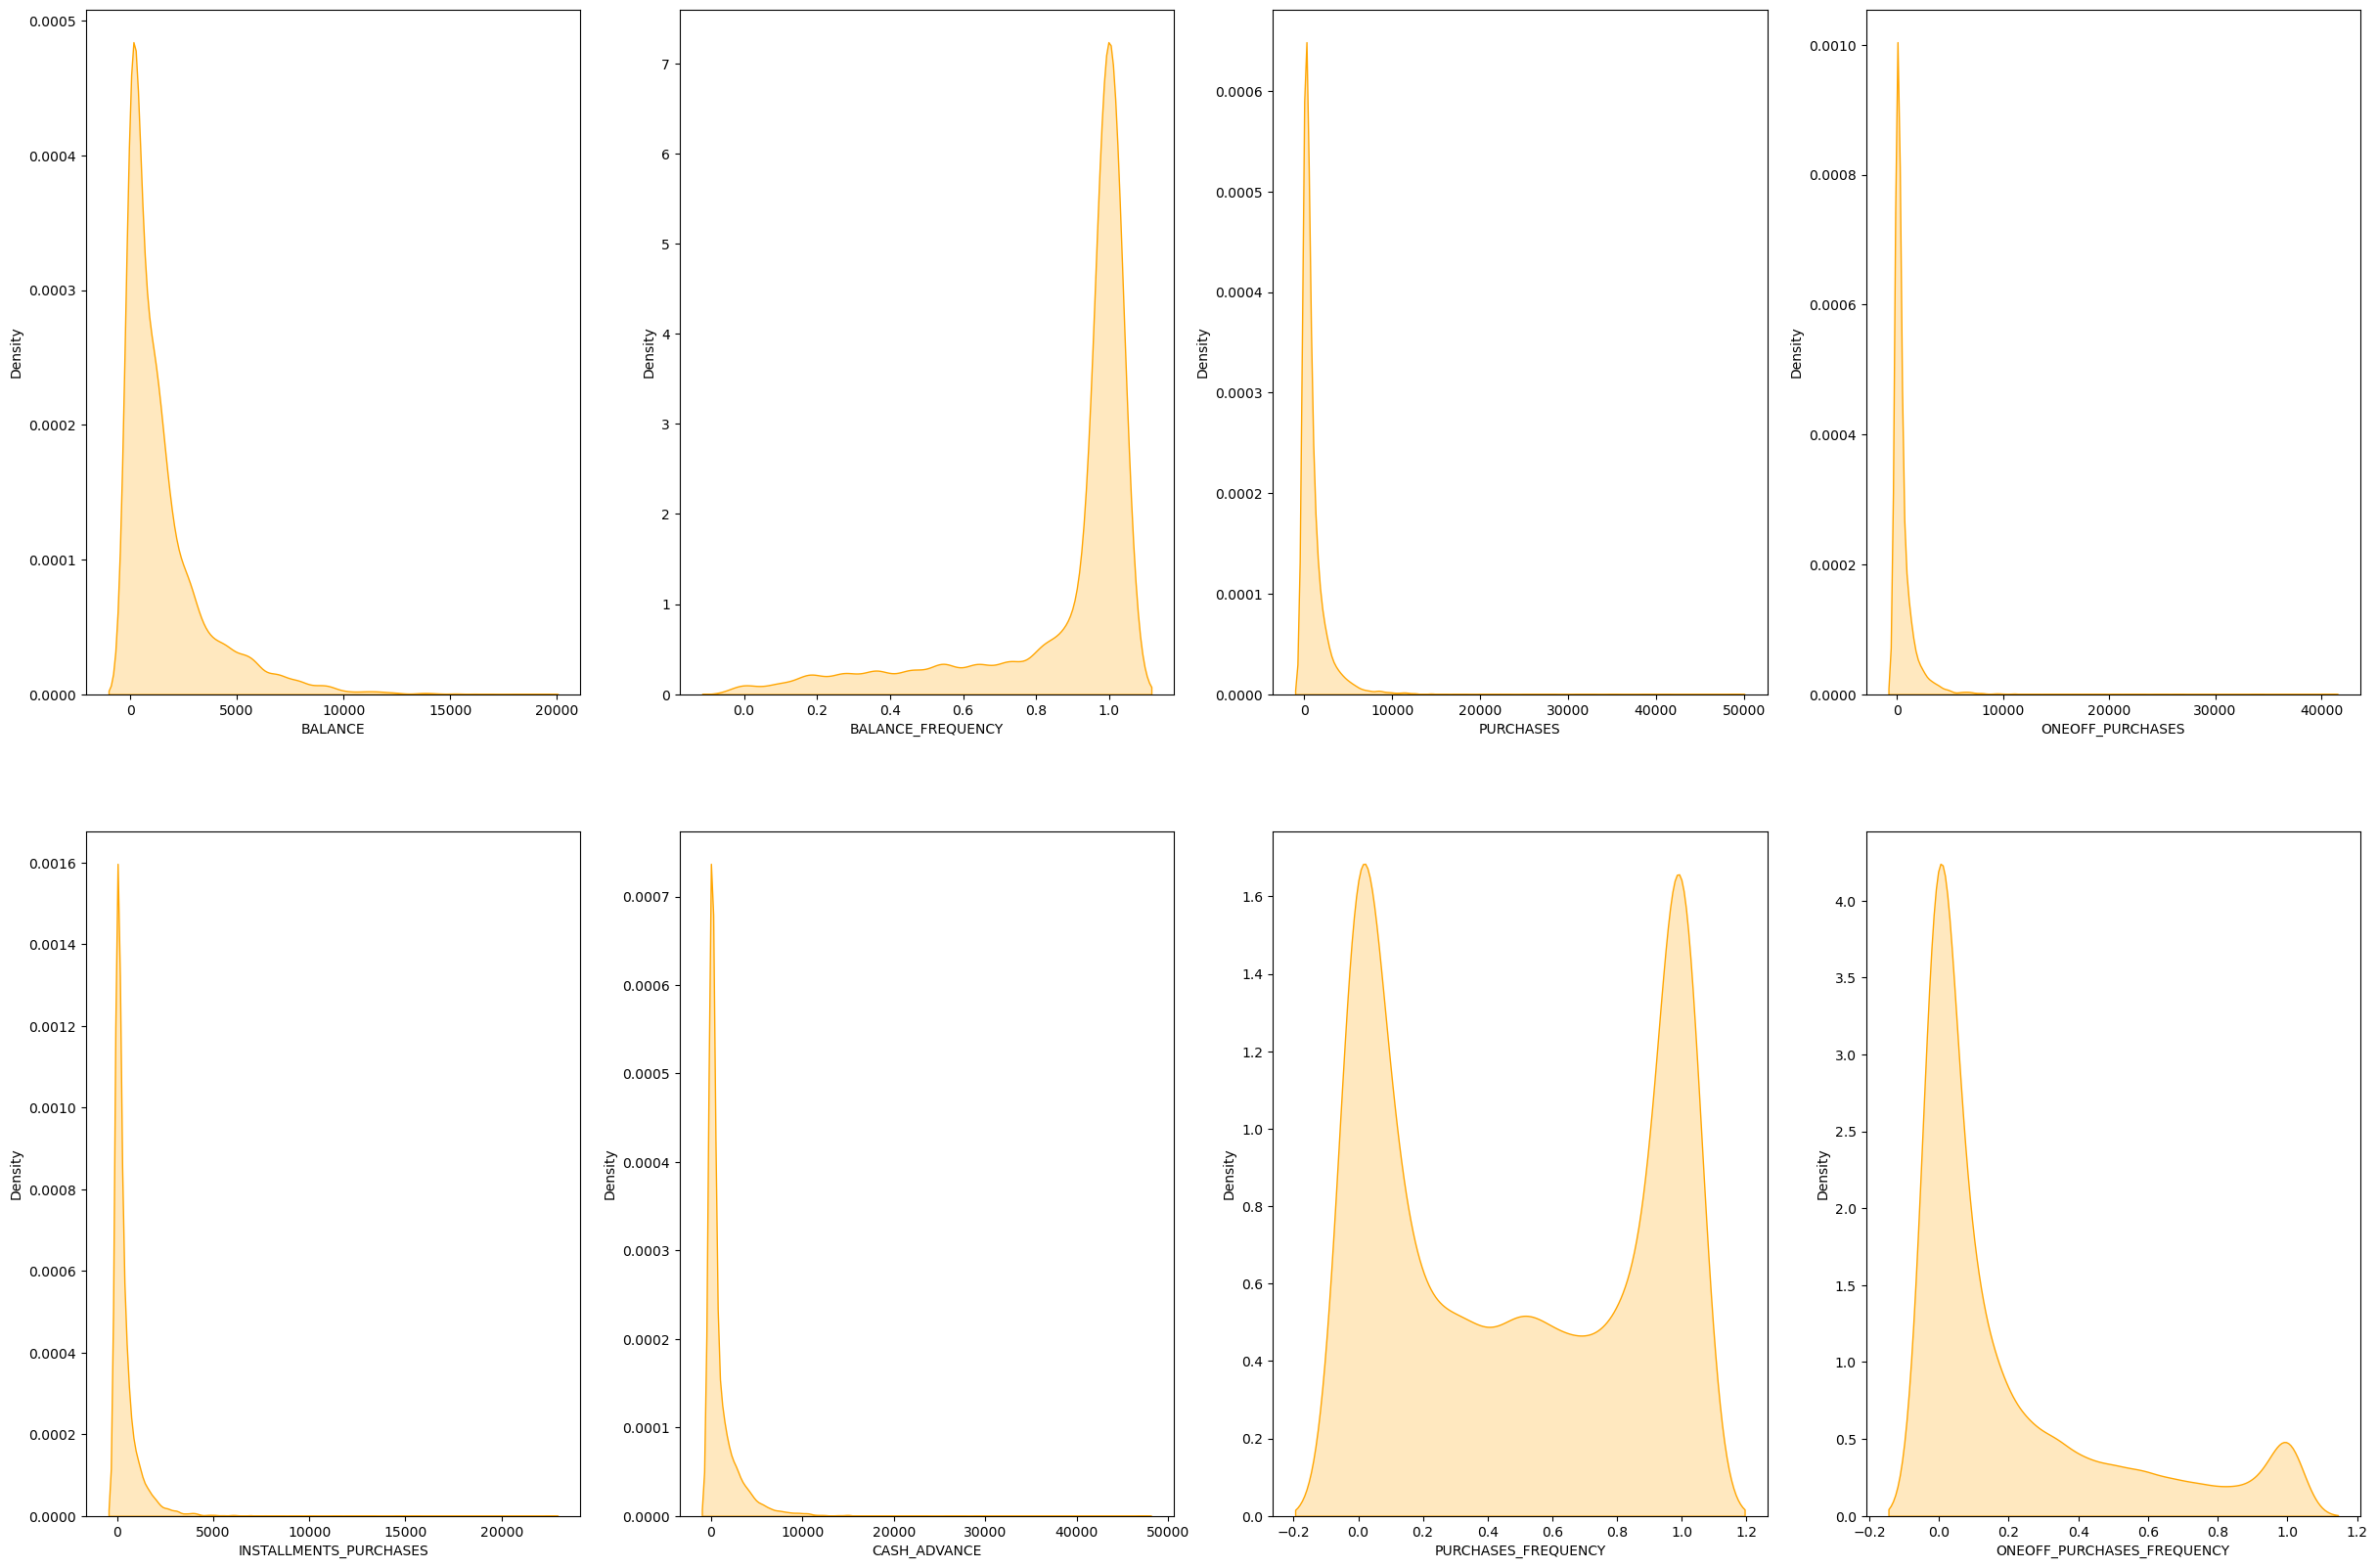

In [12]:
plt.figure(figsize=(30,20))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    sns.kdeplot(df[col],fill=True, color='orange')
plt.tight_layout()
plt.show()